### WeatherPy Analysis
- Observed trend 1: Temperature increases with proximity to equator.
- Observed trent 2: Humidity is consistently high near the equator; northern hemisphere is generally more humid than southern hemisphere.
- Observed trend 3: Cloudiness and wind speed do not exhibit clear trend with latitude.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from citipy import citipy
import requests
api_key = ""

### Generate a list of cities

In [2]:
# Choose lat and lon for query
lat_range = range(-90, 90, 5)
lon_range = range(-180, 180, 10)
lat_lon_list = []
for lat in lat_range:
    for lon in lon_range:
        lat_lon_list.append((lat, lon))

In [3]:
# Query city name and country code based on lat and lon
city_list = []
for lat, lon in lat_lon_list:
    city = citipy.nearest_city(lat, lon)
    name = city.city_name
    country = city.country_code
    city_list.append(name + "," + country)

# find unique cities
city_unique = list(set(city_list))
print(f"{len(city_unique)} unique cities selected.")

589 unique cities selected.


### Perform API calls

In [4]:
# Initiate dataframe to store data
df = pd.DataFrame()
df['City Name'] = ''
df['Country Code'] = ''
df['Latitude'] = ''
df['Longitude'] = ''
df['Max Temperature (F)'] = ''
df['Humidity (%)'] = ''
df['Cloudiness (%)'] = ''
df['Wind Speed (mph)'] = ''
df['UTC Datetime'] = ''

# Send API requests to retrieve current weather data
base_url = "http://api.openweathermap.org/data/2.5/weather"
params = {
    'appid': api_key,
    'units': 'imperial'
}
count = 0

for city in city_unique:
    params['q'] = city
    response = requests.get(base_url, params = params)
    if response.status_code == 200:
        data = response.json()
        df.loc[count, 'City Name'] = city.split(',')[0].title()
        df.loc[count, 'Country Code'] = city.split(',')[1].upper()
        df.loc[count, 'Latitude'] = data['coord']['lat']
        df.loc[count, 'Longitude'] = data['coord']['lon']
        df.loc[count, 'Max Temperature (F)'] = data['main']['temp_max']
        df.loc[count, 'Humidity (%)'] = data['main']['humidity']
        df.loc[count, 'Cloudiness (%)'] = data['clouds']['all']
        df.loc[count, 'Wind Speed (mph)'] = data['wind']['speed']
        df.loc[count, 'UTC Datetime'] = data['dt']
        
        print(f"Processing Record {count}, Latitude {data['coord']['lat']}: {city.split(',')[0].title()}")
        print(response.url.replace(api_key,'*'*len(api_key)))
        count += 1

print("-"*27)
print("Data Retrieval Complete")
print("-"*27)

Processing Record 0, Latitude -34.53: Bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=bredasdorp%2Cza
Processing Record 1, Latitude 55.1: Atagay
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=atagay%2Cru
Processing Record 2, Latitude -25.1: Lydenburg
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=lydenburg%2Cza
Processing Record 3, Latitude -0.72: Port-Gentil
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=port-gentil%2Cga
Processing Record 4, Latitude 62.1: Raduzhnyy
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=raduzhnyy%2Cru
Processing Record 5, Latitude 33.77: Fukuma
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=fukuma%2Cjp
Processing Record

Processing Record 51, Latitude -9.67: Maceio
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=maceio%2Cbr
Processing Record 52, Latitude 4.38: Harper
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=harper%2Clr
Processing Record 53, Latitude -33.59: Port Alfred
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=port+alfred%2Cza
Processing Record 54, Latitude -19.93: Mayor Pablo Lagerenza
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=mayor+pablo+lagerenza%2Cpy
Processing Record 55, Latitude 17.01: Salalah
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=salalah%2Com
Processing Record 56, Latitude -6.12: Kiunga
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=kiunga%2C

Processing Record 101, Latitude -13.19: Ambilobe
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=ambilobe%2Cmg
Processing Record 102, Latitude -24.87: Carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=carnarvon%2Cau
Processing Record 103, Latitude -15.16: Rubiataba
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=rubiataba%2Cbr
Processing Record 104, Latitude -25.41: Taltal
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=taltal%2Ccl
Processing Record 105, Latitude 13.49: La Libertad
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=la+libertad%2Csv
Processing Record 106, Latitude 58.6: Kodinsk
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=kodinsk%2Cru
Pro

Processing Record 151, Latitude 40.6: Fortuna
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=fortuna%2Cus
Processing Record 152, Latitude -13.88: Sola
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=sola%2Cvu
Processing Record 153, Latitude 18.48: Marawi
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=marawi%2Csd
Processing Record 154, Latitude 21.43: Mecca
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=mecca%2Csa
Processing Record 155, Latitude 5.56: Banda Aceh
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=banda+aceh%2Cid
Processing Record 156, Latitude -9.08: Chimbote
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=chimbote%2Cpe
Processing Record 157, Lati

Processing Record 202, Latitude 19.91: Lingao
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=lingao%2Ccn
Processing Record 203, Latitude 28.37: Naze
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=naze%2Cjp
Processing Record 204, Latitude 9.54: Ko Samui
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=ko+samui%2Cth
Processing Record 205, Latitude 39.9: Tenno
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=tenno%2Cjp
Processing Record 206, Latitude -10.26: Luwingu
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=luwingu%2Czm
Processing Record 207, Latitude -28.77: Richards Bay
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=richards+bay%2Cza
Processing Record 208,

Processing Record 253, Latitude 54.9: Bazarnyye Mataki
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=bazarnyye+mataki%2Cru
Processing Record 254, Latitude 64.42: Provideniya
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=provideniya%2Cru
Processing Record 255, Latitude 63.45: Verkhnevilyuysk
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=verkhnevilyuysk%2Cru
Processing Record 256, Latitude 63.46: Koslan
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=koslan%2Cru
Processing Record 257, Latitude 59.97: Vikersund
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=vikersund%2Cno
Processing Record 258, Latitude 35.73: Hasaki
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=impe

Processing Record 302, Latitude -9.8: Atuona
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=atuona%2Cpf
Processing Record 303, Latitude 2.29: Sibu
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=sibu%2Cmy
Processing Record 304, Latitude 59.56: Magadan
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=magadan%2Cru
Processing Record 305, Latitude 4.89: Takoradi
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=takoradi%2Cgh
Processing Record 306, Latitude -20.41: Mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=mahebourg%2Cmu
Processing Record 307, Latitude 39.89: Burriana
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=burriana%2Ces
Processing Record 308, L

Processing Record 352, Latitude -30.33: Narrabri
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=narrabri%2Cau
Processing Record 353, Latitude 29.9: Barkhan
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=barkhan%2Cpk
Processing Record 354, Latitude 65.58: Lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=lavrentiya%2Cru
Processing Record 355, Latitude -2.02: Lorengau
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=lorengau%2Cpg
Processing Record 356, Latitude 27.87: Adrar
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=adrar%2Cdz
Processing Record 357, Latitude -3.71: Vila Velha
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=vila+velha%2Cbr
Processing

Processing Record 404, Latitude 61.28: Yerbogachen
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=yerbogachen%2Cru
Processing Record 405, Latitude 62.72: Namtsy
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=namtsy%2Cru
Processing Record 406, Latitude 64.75: Skelleftea
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=skelleftea%2Cse
Processing Record 407, Latitude 5.08: Parangan
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=parangan%2Cph
Processing Record 408, Latitude 5.77: Shakiso
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=shakiso%2Cet
Processing Record 409, Latitude -45.41: Te Anau
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=te+anau%2Cnz
Processin

Processing Record 456, Latitude -5.12: Sinjai
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=sinjai%2Cid
Processing Record 457, Latitude 19.28: Bodden Town
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=bodden+town%2Cky
Processing Record 458, Latitude -33.02: East London
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=east+london%2Cza
Processing Record 459, Latitude -19.67: Shurugwi
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=shurugwi%2Czw
Processing Record 460, Latitude 65.96: Urengoy
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=urengoy%2Cru
Processing Record 461, Latitude 69.58: Lyngseidet
http://api.openweathermap.org/data/2.5/weather?appid=********************************&units=imperial&q=lyngseidet%2Cn

In [5]:
# Convert data types
df = df.infer_objects()

# Display the dataframe
df.head()

,City Name,Country Code,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),UTC Datetime
0,Bredasdorp,ZA,-34.53,20.04,64.40,68,48,8.05,1526864400
1,Atagay,RU,55.10,99.39,35.56,71,88,6.76,1526868399
2,Lydenburg,ZA,-25.10,30.46,42.04,97,0,2.17,1526868658
3,Port-Gentil,GA,-0.72,8.78,79.12,100,80,10.78,1526868658
4,Raduzhnyy,RU,62.10,77.47,51.13,100,88,10.22,1526868658


In [6]:
df.count()

City Name              504
Country Code           504
Latitude               504
Longitude              504
Max Temperature (F)    504
Humidity (%)           504
Cloudiness (%)         504
Wind Speed (mph)       504
UTC Datetime           504
dtype: int64

### Temperature vs Latitude Plot

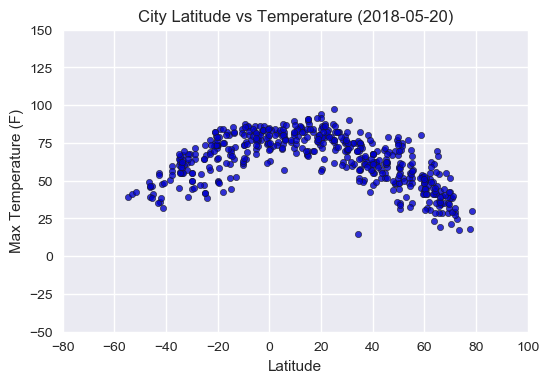

In [7]:
mpl.rcParams['figure.dpi']= 100
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']

sns.set(color_codes=True)
sns.regplot(data=df, x="Latitude", y="Max Temperature (F)", fit_reg=False, 
            scatter_kws={'facecolors': 'mediumblue', 'linewidths': 0.5, 'edgecolors': 'k', 's': 20})
plt.xlim((-80, 100))
plt.ylim((-50, 150))
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Temperature (2018-05-20)')
None

### Humidity vs Latitude Plot

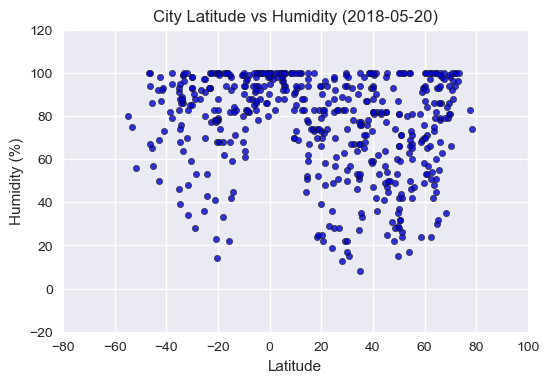

In [8]:
sns.set(color_codes=True)
sns.regplot(data=df, x="Latitude", y="Humidity (%)", fit_reg=False, 
            scatter_kws={'facecolors': 'mediumblue', 'linewidths': 0.5, 'edgecolors': 'k', 's': 20})
plt.xlim((-80, 100))
plt.ylim((-20, 120))
plt.title('City Latitude vs Humidity (2018-05-20)')
None

### Cloudiness vs Latitude Plot

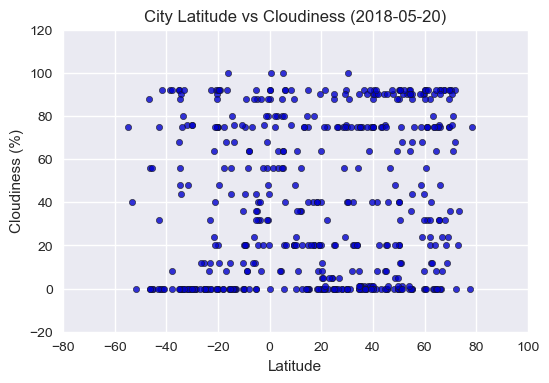

In [9]:
sns.set(color_codes=True)
sns.regplot(data=df, x="Latitude", y="Cloudiness (%)", fit_reg=False, 
            scatter_kws={'facecolors': 'mediumblue', 'linewidths': 0.5, 'edgecolors': 'k', 's': 20})
plt.xlim((-80, 100))
plt.ylim((-20, 120))
plt.title('City Latitude vs Cloudiness (2018-05-20)')
None

### Wind Speed vs Latitude Plot

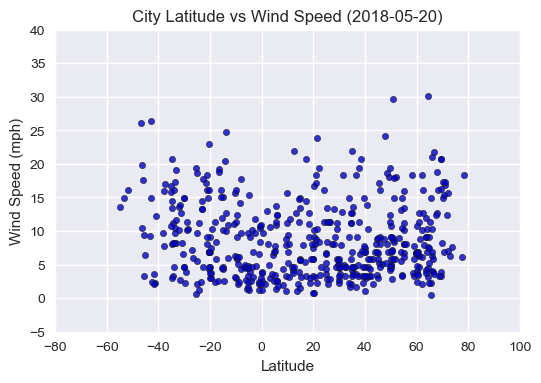

In [10]:
sns.set(color_codes=True)
sns.regplot(data=df, x="Latitude", y="Wind Speed (mph)", fit_reg=False, 
            scatter_kws={'facecolors': 'mediumblue', 'linewidths': 0.5, 'edgecolors': 'k', 's': 20})
plt.xlim((-80, 100))
plt.ylim((-5, 40))
plt.title('City Latitude vs Wind Speed (2018-05-20)')
None